In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr


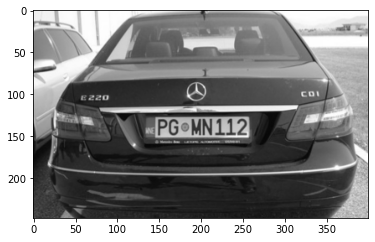

In [61]:
img = cv2.imread(r"Cars1.png")
imggray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(imggray,cv2.COLOR_BGR2RGB))

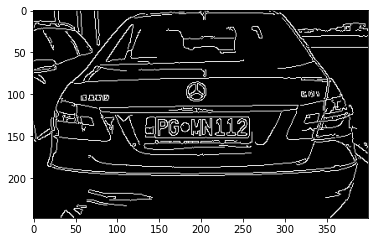

In [62]:
bfilter = cv2.bilateralFilter(imggray,11,17,17)#noise reduction
imgcanny = cv2.Canny(bfilter,30,200)#Edge Detection
plt.imshow(cv2.cvtColor(imgcanny,cv2.COLOR_BGR2RGB))

In [63]:
keypoints = cv2.findContours(imgcanny.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]# returning top 10 contoours


In [67]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,15,True) #approximate the polygon from contour
    if len(approx) == 4:
        location = approx
        break


In [68]:
print(location)

[[[135 129]]

 [[134 151]]

 [[258 149]]

 [[257 127]]]


In [69]:
mask = np.zeros(imggray.shape, np.uint8)
# if len(contours) > 0:
#     cnt=contours[len(contours)-1]
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask = mask)
cv2.imshow('output',new_image)
cv2.waitKey() #image will not show until this is called
cv2.destroyWindow('HelloWorld')

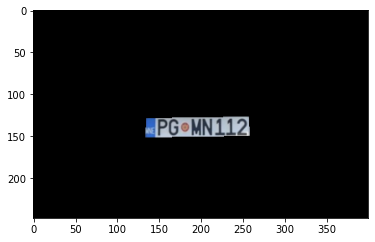

In [70]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [71]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = imggray[x1:x2+1, y1:y2+1]

In [72]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[10, 0], [125, 0], [125, 25], [10, 25]], 'PGoMN112', 0.6859364701519888)]

In [73]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
cv2.imshow("Outlines",res)
cv2.waitKey() #image will not show until this is called
cv2.destroyWindow('HelloWorld')

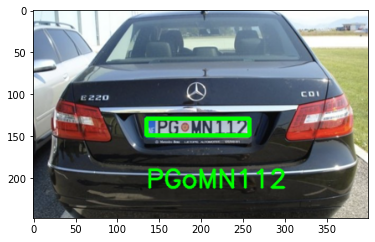

In [74]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))